In [751]:
# from sklearn import svm,metrics
from sklearn.linear_model import LinearRegression   # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [752]:
# 데이터 불러오기
# 데이터 확인, nan,0,타입,피쳐데이터간격
# 문자타입: 삭제or변경(아스키코드, 원핫인코딩)
# 데이터간 상관관계
# 데이터 전처리:    data, result
#                  train, test세트 분리
# 데이터 실습
# 데이터 예측                

In [753]:
import pandas as pd
df = pd.read_csv('picher_stats_2017.csv')
df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [767]:
# 원핫인코딩
df.iloc[:,1]
team = pd.get_dummies(df.iloc[:,1], dtype=int)
team
df = pd.concat((df,team),axis=1)
df

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,85000,0,0,0,0,1,0,0,0,0
1,소사,LG,11,11,1,0,0,30,29,185.1,...,50000,0,0,1,0,0,0,0,0,0
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,150000,1,0,0,0,0,0,0,0,0
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,100000,0,0,1,0,0,0,0,0,0
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,85000,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,2,5,0,0,2,33,5,62.2,...,8100,0,0,0,0,0,0,0,0,1
148,정용운,KIA,3,2,0,0,0,25,11,59.1,...,3100,1,0,0,0,0,0,0,0,0
149,노경은,롯데,0,2,0,0,0,9,2,14.2,...,16000,0,0,0,0,0,0,1,0,0
150,김승현,삼성,0,3,0,1,0,41,0,43.2,...,2900,0,0,0,0,0,0,0,1,0


In [ ]:

data = df.iloc[:,2:-2]
result = df.iloc[:,-2]
result

0      140000
1      120000
2      230000
3      100000
4      111000
        ...  
147      7100
148      7500
149     10000
150      4000
151      4000
Name: 연봉(2018), Length: 152, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, result,
)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input,train_target)

LinearRegression()

In [ ]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.603728627896661
0.8451946244148394


-------------------------------

In [ ]:
# 특성을 추가해서 모델 적용
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [ ]:
lr = LinearRegression()
lr.fit(train_poly,train_target)

LinearRegression()

In [ ]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

1.0
-1.2753586028774664


----------------------------------------------------------

In [ ]:
# 규제적용
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
# 릿지규제
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled,train_target)

Ridge()

In [ ]:
ridge.score(train_scaled,train_target)
ridge.score(test_scaled,test_target)

-4.675038517831393

In [ ]:
train_score = []
test_score = []

alpha_list = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled,train_target)
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))

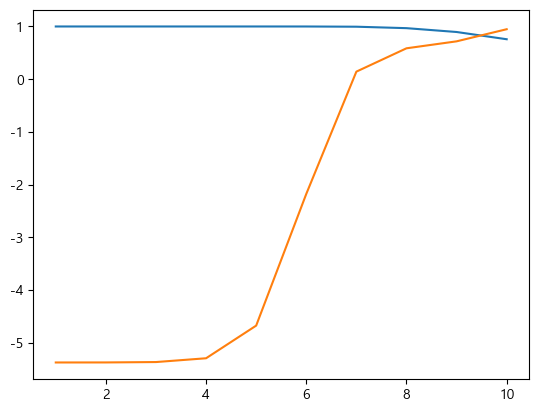

In [ ]:
x = np.arange(1,11).reshape(-1,1)
plt.plot(x,train_score)
plt.plot(x,test_score)

In [ ]:
ridge = Ridge(alpha=80000)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.7783693509350327
0.9404992026303431
